In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from queue_function import run_queue_experiment

In [3]:
data = run_queue_experiment(random_seed=1, time=20000, arrival_rate=0.9, capacity_server=1)
print(np.mean(data.wait_times))
print(np.mean(data.n_queue))

7.933459122043015
7.158061292471685


In [ ]:
#plot that shows how the mean wait time changes for multiple time intervals (so we can decide on the appropriate time)

18012
18012


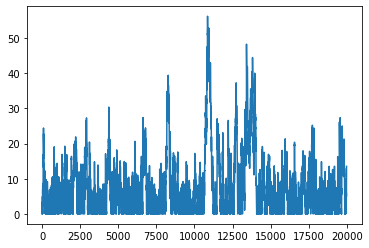

In [4]:
print(len(data.times))
print(len(data.wait_times))
#print(data.wait_times)
plt.plot(data.times, data.wait_times)
#plt.plot(data.times, data.n_queue)
#plt.hist(data.wait_times)
plt.show()

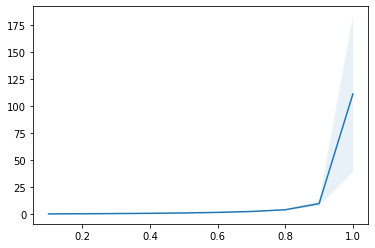

In [9]:
def vary_rho():
    capacity_server = 1
    n_runs = 10
    rhos = np.linspace(0.1 ,1, 10)
    run_data = []
    for run in range(n_runs):
        rho_data = []
        for rho in rhos:
            data = run_queue_experiment(random_seed=run, time=20000, arrival_rate=rho*capacity_server, capacity_server=capacity_server) #not sure what the best way is to seed
            rho_data.append(np.mean(data.wait_times))
        run_data.append(rho_data)
    run_data = np.array(run_data)
    return run_data, rhos

run_data, rhos = vary_rho()
run_data_mean = np.mean(run_data, axis=0)
run_data_std = np.std(run_data, axis=0, ddof=1)
plt.plot(rhos, run_data_mean)
plt.fill_between(rhos, run_data_mean - run_data_std, run_data_mean + run_data_std, alpha=0.1)
plt.show()


